Предобработка

In [1]:
import pandas as pd
import numpy as np
import folium as fl
import seaborn as sns
import datetime as dt

In [12]:
train = pd.read_csv('/content/x_train.csv')
y = pd.read_csv('/content/y_train.csv')
train = pd.concat([train, y], axis=1)
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,20150324T000000,4,2.50,2680,4499,2.0,0,0,3,9,2680,0,1999,0,98006,47.5650,-122.125,807100.0
1,20141001T000000,4,1.75,2340,5080,1.0,0,0,5,7,1170,1170,1924,0,98115,47.6746,-122.320,570000.0
2,20140812T000000,4,2.25,2190,9020,2.0,0,0,3,8,2190,0,1978,0,98032,47.3742,-122.284,320000.0
3,20140623T000000,2,1.75,2260,280962,2.0,0,2,3,9,1890,370,2005,0,98014,47.6359,-121.940,649000.0
4,20140626T000000,4,1.75,2110,265716,1.0,0,0,4,8,2110,0,1979,0,98053,47.6570,-122.026,568000.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15129 non-null  object 
 1   bedrooms       15129 non-null  int64  
 2   bathrooms      15129 non-null  float64
 3   sqft_living    15129 non-null  int64  
 4   sqft_lot       15129 non-null  int64  
 5   floors         15129 non-null  float64
 6   waterfront     15129 non-null  int64  
 7   view           15129 non-null  int64  
 8   condition      15129 non-null  int64  
 9   grade          15129 non-null  int64  
 10  sqft_above     15129 non-null  int64  
 11  sqft_basement  15129 non-null  int64  
 12  yr_built       15129 non-null  int64  
 13  yr_renovated   15129 non-null  int64  
 14  zipcode        15129 non-null  int64  
 15  lat            15129 non-null  float64
 16  long           15129 non-null  float64
 17  price          15129 non-null  float64
dtypes: flo

In [4]:
train.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 0 to 15128
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15129 non-null  object 
 1   bedrooms       15129 non-null  int64  
 2   bathrooms      15129 non-null  float64
 3   sqft_living    15129 non-null  int64  
 4   sqft_lot       15129 non-null  int64  
 5   floors         15129 non-null  float64
 6   waterfront     15129 non-null  int64  
 7   view           15129 non-null  int64  
 8   condition      15129 non-null  int64  
 9   grade          15129 non-null  int64  
 10  sqft_above     15129 non-null  int64  
 11  sqft_basement  15129 non-null  int64  
 12  yr_built       15129 non-null  int64  
 13  yr_renovated   15129 non-null  int64  
 14  zipcode        15129 non-null  int64  
 15  lat            15129 non-null  float64
 16  long           15129 non-null  float64
 17  price          15129 non-null  float64
dtypes: flo

In [5]:
train["price"]= train["price"].astype("int64")
train["bedrooms"]= train["bedrooms"].astype("int64")
train["bathrooms"]= train["bathrooms"].astype("int64")
train["floors"]= train["floors"].astype("int64")
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,20150324T000000,4,2,2680,4499,2,0,0,3,9,2680,0,1999,0,98006,47.5650,-122.125,807100
1,20141001T000000,4,1,2340,5080,1,0,0,5,7,1170,1170,1924,0,98115,47.6746,-122.320,570000
2,20140812T000000,4,2,2190,9020,2,0,0,3,8,2190,0,1978,0,98032,47.3742,-122.284,320000
3,20140623T000000,2,1,2260,280962,2,0,2,3,9,1890,370,2005,0,98014,47.6359,-121.940,649000
4,20140626T000000,4,1,2110,265716,1,0,0,4,8,2110,0,1979,0,98053,47.6570,-122.026,568000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,20141113T000000,3,1,1000,6914,1,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,378000
15125,20141111T000000,3,2,3087,5002,2,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,399950
15126,20140930T000000,3,2,2120,4780,2,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,575000
15127,20140620T000000,1,0,380,15000,1,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,245000


In [6]:
def has_basement(x):
  if x != 0:
    return 1
  else:
    return 0

def is_reneval(x):
  if x != 0:
    return 1
  else:
    return 0

def age_make(x):
    return 2020 - x


In [13]:
train['age'] = train.apply(lambda x : age_make(x['yr_built']), axis=1)
train['basement'] = train.apply(lambda x : has_basement(x['sqft_basement']), axis=1)
train['flg_reneval'] = train.apply(lambda x : is_reneval(x['yr_renovated']), axis=1)
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,age,basement,flg_reneval
0,20150324T000000,4,2.50,2680,4499,2.0,0,0,3,9,...,0,1999,0,98006,47.5650,-122.125,807100.0,21,0,0
1,20141001T000000,4,1.75,2340,5080,1.0,0,0,5,7,...,1170,1924,0,98115,47.6746,-122.320,570000.0,96,1,0
2,20140812T000000,4,2.25,2190,9020,2.0,0,0,3,8,...,0,1978,0,98032,47.3742,-122.284,320000.0,42,0,0
3,20140623T000000,2,1.75,2260,280962,2.0,0,2,3,9,...,370,2005,0,98014,47.6359,-121.940,649000.0,15,1,0
4,20140626T000000,4,1.75,2110,265716,1.0,0,0,4,8,...,0,1979,0,98053,47.6570,-122.026,568000.0,41,0,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories = "auto",sparse = False, drop = "first")
temp = ohe.fit_transform(train[["zipcode"]])
ohe_column = pd.DataFrame(temp)
train = pd.concat([train,ohe_column],axis = 1)
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,59,60,61,62,63,64,65,66,67,68
0,20150324T000000,4,2.50,2680,4499,2.0,0,0,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20141001T000000,4,1.75,2340,5080,1.0,0,0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20140812T000000,4,2.25,2190,9020,2.0,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20140623T000000,2,1.75,2260,280962,2.0,0,2,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20140626T000000,4,1.75,2110,265716,1.0,0,0,4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train = train.drop(columns = ['zipcode', 'yr_built', 'yr_renovated', 'date'], axis = 1)
train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,59,60,61,62,63,64,65,66,67,68
0,4,2.50,2680,4499,2.0,0,0,3,9,2680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.75,2340,5080,1.0,0,0,5,7,1170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.25,2190,9020,2.0,0,0,3,8,2190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.75,2260,280962,2.0,0,2,3,9,1890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.75,2110,265716,1.0,0,0,4,8,2110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


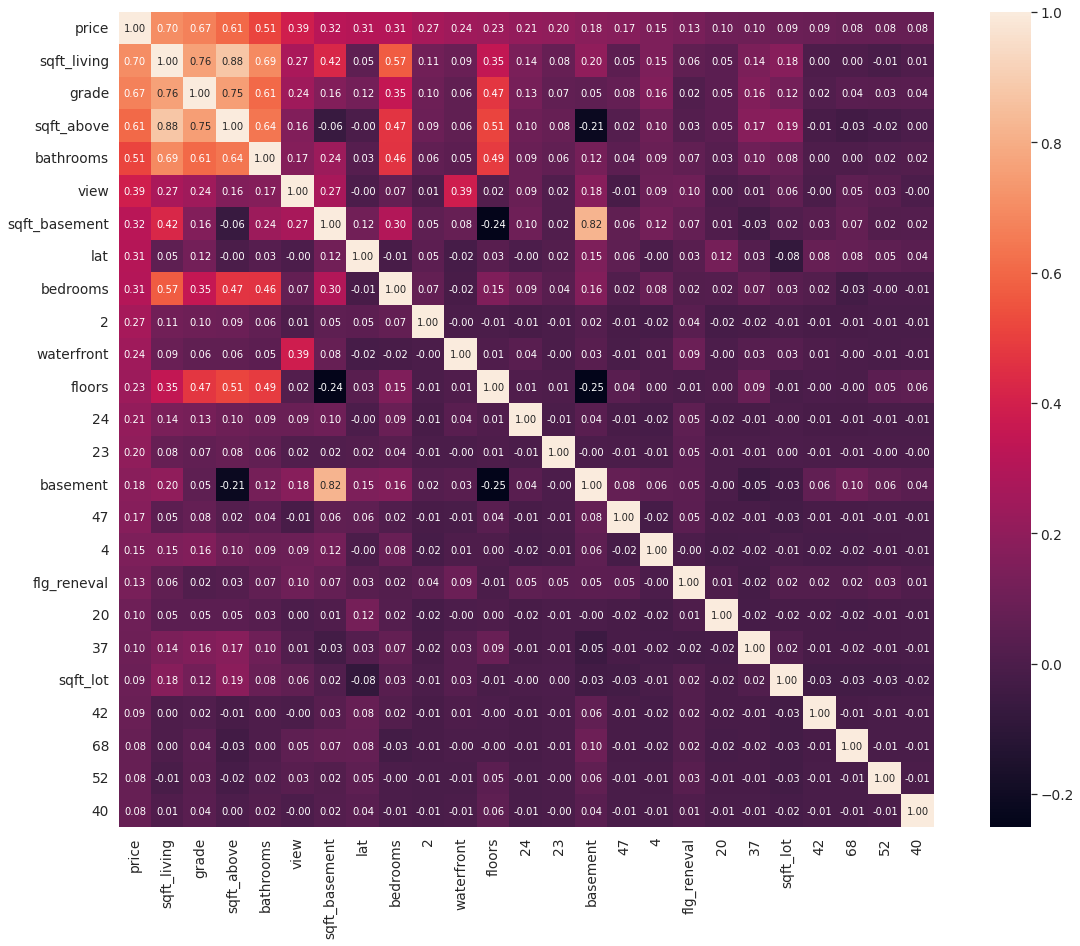

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
corrmat = train.corr()
cols = corrmat.nlargest(25, 'price')['price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [145]:
x1 = train['price'].quantile(0.99)
x2 = train['bedrooms'].quantile(0.9999)
x3 = train['bathrooms'].quantile(0.999)
train = train[train['price'] <= x1]
train = train[train['sqft_lot'] <= train['sqft_lot'].quantile(0.99)]
train = train[train['sqft_living'] <= 6000]
train = train[train['sqft_above'] <= 6000]  
train = train[train['sqft_basement'] <= 2500]
train = train[train['bedrooms'] <= x2]
train = train[train['bathrooms'] <= x3]
train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,price,age,basement,flg_reneval
0,4,2,2680,4499,2,0,0,3,9,2680,0,47.5650,-122.125,807100,21.0,0,0
1,4,1,2340,5080,1,0,0,5,7,1170,1170,47.6746,-122.320,570000,96.0,1,0
2,4,2,2190,9020,2,0,0,3,8,2190,0,47.3742,-122.284,320000,42.0,0,0
5,2,1,680,8640,1,0,0,4,5,680,0,47.4559,-122.289,193000,69.0,0,0
6,5,3,2760,3865,2,0,0,3,8,2760,0,47.5049,-122.170,424950,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,3,1,1000,6914,1,0,0,3,7,1000,0,47.7144,-122.319,378000,73.0,0,0
15125,3,2,3087,5002,2,0,0,3,8,3087,0,47.2974,-122.349,399950,6.0,0,0
15126,3,2,2120,4780,2,0,0,3,7,2120,0,47.6810,-122.032,575000,16.0,0,0
15127,1,0,380,15000,1,0,0,3,5,380,0,47.4810,-122.323,245000,57.0,0,0


In [16]:
train = train.drop(columns = ['long', 'basement', 'lat'], axis = 1)
train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,59,60,61,62,63,64,65,66,67,68
0,4,2.50,2680,4499,2.0,0,0,3,9,2680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.75,2340,5080,1.0,0,0,5,7,1170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.25,2190,9020,2.0,0,0,3,8,2190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.75,2260,280962,2.0,0,2,3,9,1890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.75,2110,265716,1.0,0,0,4,8,2110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = train.drop(['price'], axis=1)
y = train["price"]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,59,60,61,62,63,64,65,66,67,68
0,4,2.50,2680,4499,2.0,0,0,3,9,2680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.75,2340,5080,1.0,0,0,5,7,1170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.25,2190,9020,2.0,0,0,3,8,2190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.75,2260,280962,2.0,0,2,3,9,1890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.75,2110,265716,1.0,0,0,4,8,2110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,3,1.50,1000,6914,1.0,0,0,3,7,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15125,3,2.50,3087,5002,2.0,0,0,3,8,3087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15126,3,2.50,2120,4780,2.0,0,0,3,7,2120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15127,1,0.75,380,15000,1.0,0,0,3,5,380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
scores = cross_validate(model, x_poly, y, cv=5,scoring=('r2'))

scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


{'fit_time': array([27.8034482 , 27.53922844, 27.50254011, 27.27257848, 27.03419375]),
 'score_time': array([0.01470327, 0.01984262, 0.01435971, 0.01449203, 0.02084017]),
 'test_score': array([0.80410895, 0.87664982, 0.88337026, 0.87729439, 0.873613  ])}

In [19]:
test = pd.read_csv('/content/x_test.csv')
test = test.drop(columns=["date"])
test["bedrooms"]= test["bedrooms"].astype("int64")
test["bathrooms"]= test["bathrooms"].astype("int64")
test["floors"]= test["floors"].astype("int64")
test['age'] = test.apply(lambda x : age_make(x['yr_built']), axis=1)
test['basement'] = test.apply(lambda x : has_basement(x['sqft_basement']), axis=1)
test['flg_reneval'] = test.apply(lambda x : is_reneval(x['yr_renovated']), axis=1)
temp = ohe.transform(test[["zipcode"]])
ohe_column = pd.DataFrame(temp)
test = pd.concat([test,ohe_column],axis = 1)
test = test.drop(columns = ['zipcode', 'yr_built', 'yr_renovated'], axis = 1)
test = test.drop(columns = ['long', 'basement', 'lat'], axis = 1)


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(x_poly, y)


y_test = pd.DataFrame(model.predict(polynomial_features.fit_transform(test)), columns=['price'])
y_test.to_csv('1.csv', index=True, index_label='Id')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [169]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import make_scorer
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
#fv = X.var().sort_values(ascending = False)
#X = X[fv[fv < np.percentile(fv, 80)].index]
#X

,age,grade,bedrooms,bathrooms,condition,floors
0,21.0,9,4,2.50,3,2.0
1,96.0,7,4,1.75,5,1.0
2,42.0,8,4,2.25,3,2.0
3,15.0,9,2,1.75,3,2.0
4,41.0,8,4,1.75,4,1.0
...,...,...,...,...,...,...
15124,73.0,7,3,1.50,3,1.0
15125,6.0,8,3,2.50,3,2.0
15126,16.0,7,3,2.50,3,2.0
15127,57.0,5,1,0.75,3,1.0


In [ ]:
X = StandardScaler().fit_transform(X)
X 

array([[ 0.95796781,  0.65675407,  1.40626198, ...,  0.96821689,
        -1.14667316, -1.45805403],
       [ 0.95796781, -1.03295301,  0.85570046, ..., -1.70446516,
         1.0986795 ,  0.68584564],
       [ 0.95796781,  0.65675407,  0.61280567, ..., -0.42622592,
         0.45715017,  0.68584564],
       ...,
       [-0.33263448,  0.65675407,  2.0653165 , ..., -0.54242948,
         1.41944417, -1.45805403],
       [-0.33263448,  0.65675407,  0.49945477, ...,  1.6654383 ,
         0.77791484, -1.45805403],
       [ 0.95796781,  0.65675407,  2.13494633, ...,  1.08442046,
        -1.14667316, -1.45805403]])

In [175]:
est = Lasso(max_iter=10000)
gscv = GridSearchCV(est, {"alpha": np.logspace(-5, 5)}, scoring=make_scorer(r2_score))
gscv.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e+13, tolerance: 1.528e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.249e+13, tolerance: 1.559e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             scoring=make_scorer(r2_score))

In [176]:
gscv.best_estimator_

Lasso(alpha=910.2981779915227, max_iter=10000)

In [177]:
gscv.best_score_

0.6618293922094047

In [ ]:
test = pd.read_csv('/content/x_test.csv')
test = test.drop(columns = ['zipcode', 'lat', 'long', 'date'], axis = 1)
test['age'] = test.apply(lambda x : age_make(x['yr_built'], x['yr_renovated']), axis=1)
test = test.drop(columns = ['yr_built', 'yr_renovated'], axis = 1)
test = test.drop(columns = ['sqft_basement', 'sqft_lot', 'waterfront', 'view'], axis = 1)
X_test = StandardScaler().fit_transform(test)

In [ ]:
Y_test = pd.DataFrame(gscv.predict(X_test), columns=['price'])
Y_test

,price
0,5.151703e+05
1,7.027547e+05
2,1.147649e+06
3,1.534259e+06
4,7.121207e+05
...,...
6479,6.082171e+05
6480,6.622071e+05
6481,2.890453e+05
6482,8.703820e+05


In [ ]:
Y_test.to_csv('1.csv', index=True, index_label='Id') 

In [ ]:
sample = pd.read_csv('/content/dummy.csv')
sample

,Id,price
0,0,446347.7872
1,1,622030.3582
2,2,557501.2517
3,3,650648.5913
4,4,649773.1809
...,...,...
6479,6479,451246.3226
6480,6480,609852.9281
6481,6481,652034.8811
6482,6482,569301.8771
